## Домашняя работа 5. 
![](https://newapplift-production.s3.amazonaws.com/comfy/cms/files/files/000/001/201/original/machine-learning-robots-dilbert.gif)

Результат домашней работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

## Данные


В этой домашней работе мы научимся обучать модели машинного обучения, корректно ставить эксперименты, подбирать гиперпараметры, сравнивать и смешивать модели. Вам предлагается решить задачу бинарной классификации, а именно построить алгоритм, определяющий превысит ли средний заработок человека порог $50k. Каждый объект выборки — человек, для которого известны следующие признаки:
 - age
 - workclass
 - fnlwgt
 - education
 - education-num
 - marital-status
 - occupation
 - relationship
 - race
 - sex
 - capital-gain
 - capital-loss
 - hours-per-week
 
Более подробно про признаки можно почитать [здесь](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Целевой признак записан в переменной *>50K,<=50K*.

## Метрика качества

Обучение и оценка качества модели производится на независимых множествах примеров. Как правило, имеющующиеся примеры разбивают на два подмножества: обучение (train) и контроль (test). Выбор пропорции разбиения — компромисс. Действительно, большой размер обучения ведет к более качественным алгоритмам, но бОльшему шуму в оценке модели на контроле. И наоборот, большой размер контрольной выборки ведет к менее шумной оценке качества, однако модели получаются менее точными.

Многие модели классификации получают оценку принадлежности положительному классу $\tilde{y}(x) \in R$ (например, вероятность принадлежности классу 1). Затем принимают решение о классе объекта путем сравнения оценки с некоторым порогом $\theta$:

$y(x) = +1$,  если $\tilde{y}(x) \geq \theta$, $y(x) = -1$, если $\tilde{y}(x) < \theta$

В этом случае можно рассматривать метрики, которые умеют работать с исходным ответом классификатора. В задании мы будем работать с метрикой AUC-ROC. Детального понимания принципов работы метрики AUC-ROC для выполнения лабораторной не требуется.

## Подбор гиперпараметров модели

В задачах машинного обучения следует различать параметры модели и гиперпараметры (структурные параметры). Обычно параметры модели настраиваются в ходе обучения (например, веса в линейной модели или структура решающего дерева), в то время как гиперпараметры задаются заранее (например, регуляризация в линейной модели или максимальная глубина решающего дерева). Каждая модель обычно имеет множество гиперпараметров, и нет универсальных наборов гиперпараметров, оптимально работающих во всех задачах, для каждой задачи нужно подбирать свой набор.

Для оптимизации гиперпараметров модели часто используют _перебор по сетке (grid search)_: для каждого гиперпараметра выбирается несколько значений, перебираются все комбинации значений и выбирается комбинация, на которой модель показывает лучшее качество (с точки зрения метрики, которая оптимизируется). Однако в этом случае нужно грамотно оценивать построенную модель, а именно делать разбиение на обучающую и тестовую выборку. Есть несколько схем, как это можно реализовать: 

 - Разбить имеющуюся выборку на обучающую и тестовую. В этом случае сравнение большого числа моделей при переборе параметров приводит к ситуации, когда лучшая на тестовой подвыборке модель не сохраняет свои качества на новых данных. Можно сказать, что происходит _переобучение_ на тестовую выборку.
 - Для устранения описанной выше проблемы, можно разбить данные на 3 непересекающихся подвыборки: обучение (`train`), валидация (`validation`) и контроль (`test`). Валидационную подвыборку используют для сравнения моделей, а `test` — для окончательной оценки качества и сравнения семейств моделей с подобранными параметрами.
 - Другой способ сравнения моделей — [кросс-валидация](http://en.wikipedia.org/wiki/Cross-validation_(statistics). Существуют различные схемы кросс-валидации:
  - Leave-One-Out
  - K-Fold
  - Многократное случайное разбиение выборки
  
Кросс-валидация вычислительно затратна, особенно если вы делаете перебор по сетке с очень большим числом комбинации. С учетом конечности времени на выполнение задания, возникает ряд компромиссов: 
  - сетку можно делать более разреженной, перебирая меньше значений каждого параметра; однако, надо не забывать, что в таком случае можно пропустить хорошую комбинацию параметров;
  - кросс-валидацию можно делать с меньшим числом разбиений или фолдов, но в таком случае оценка качества кросс-валидации становится более шумной и увеличивается риск выбрать неоптимальный набор параметров из-за случайности разбиения;
  - параметры можно оптимизировать последовательно (жадно) — один за другим, а не перебирать все комбинации; такая стратегия не всегда приводит к оптимальному набору;
  - перебирать не все комбинации параметров, а небольшое число случайно выбранных.

## Задание

Прежде чем приступать к заданию, рекомендуем в начале прочитать его до конца.

Загрузите набор данных *data.adult.csv*. Чтобы лучше понимать, с чем вы работаете/корректно ли вы загрузили данные можно вывести несколько первых строк на экран.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import binarize

In [2]:
df = pd.read_csv('data.adult.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,<=50K
16276,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45,>50K
16277,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40,<=50K
16278,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,<=50K


Иногда в данных встречаются пропуски. Как задаются пропуски обычно либо прописывается в описании к данным, либо просто на месте пропуска после чтения данных оказывается значение numpy.nan. Более подробно о работе с пропусками в Pandas можно прочитать например [здесь](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). 

В данном датасете пропущенные значения обозначены как "?". 

**(0.5 балла)** Найдите все признаки, имеющие пропущенные значения. Удалите из выборки все объекты с пропусками.

In [3]:
df2 = df.replace('?', np.nan).dropna()
df2

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,">50K,<=50K"
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,<=50K
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40,<=50K
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,<=50K
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,<=50K
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,<=50K
16276,32,Private,207668,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,45,>50K
16277,27,Private,104457,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0,0,40,<=50K
16278,59,State-gov,268700,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,<=50K


Обычно после загрузки датасета всегда необходима его некоторая предобработка. В данном случае она будет заключаться в следующем: 

 - Выделите целевую переменную (ту, которую мы хотим предсказывать) в отдельную переменную, удалите ее из датасета и преобразуйте к бинарному формату.
 - Обратите внимание, что не все признаки являются вещественными (числовыми). В начале мы будем работать только с вещественными признаками. Выделите их отдельно.

### Целевая переменная

In [4]:
y = df2['>50K,<=50K']
del df2['>50K,<=50K']
dummy_replace = {'>50K': 1, '<=50K':0}
y_dummy = y.map(dummy_replace)

In [5]:
y_dummy

0        0
1        0
2        0
3        0
4        1
        ..
16275    0
16276    1
16277    0
16278    0
16279    1
Name: >50K,<=50K, Length: 15347, dtype: int64

### Выделение вещественных признаков

In [6]:
X_numeric = df2.select_dtypes(include=['number'])
X_numeric

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40
...,...,...,...,...,...,...
16275,25,514716,13,0,0,40
16276,32,207668,13,15024,0,45
16277,27,104457,13,0,0,40
16278,59,268700,9,0,0,40


## Обучение классификаторов на вещественных признаках

В данном разделе необходимо будет работать только с вещественными признаками и целевой переменной.

В начале посмотрим как работает подбор параметров по сетке и как влияет на качество разбиение выборки. Сейчас и далее будем рассматривать 4 алгоритма:
 - [kNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - [DecisonTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
 - [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
 - [SGD Linear Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

Для начала у первых трёх алгоритмов выберем один гиперпараметр, который будем оптимизировать:
 - kNN — число соседей (*n_neighbors*)
 - DecisonTree — глубина дерева (*max_depth*)
 - SGD Linear Classifier — оптимизируемая функция (*loss*)
 
Остальные параметры оставляйте в значениях по умолчанию. Для подбора гиперпараметров воспользуйтесь перебором по сетке, который реализован в классе [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). В качестве схемы кросс-валидации используйте 5-fold cv, которую можно задать с помощью класса [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

**(1.5 балла)** Для каждого алгоритма подберите оптимальные значения указанных гиперпараметров. Постройте график среднего качества по кросс-валидации алгоритма при заданном значении гиперпараметра, на котором также отобразите доверительный интервал.

### kNN

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
neighbors_range = dict(n_neighbors = np.arange(1, 31))
grid = GridSearchCV(knn, neighbors_range, cv=5, scoring='roc_auc')
grid.fit(X_numeric, y_dummy)
grid.best_params_

{'n_neighbors': 4}

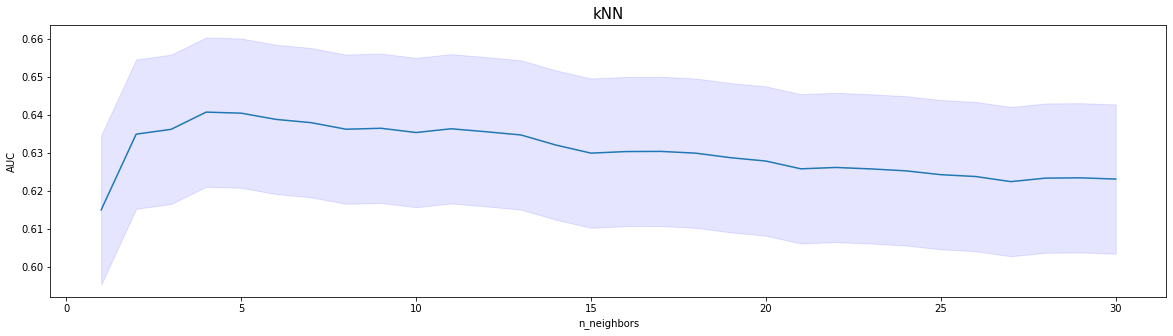

In [9]:
neighbors = np.arange(1, 31)
mean_scores = grid.cv_results_['mean_test_score']
ci = 1.96 * np.std(mean_scores) / np.mean(mean_scores)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(neighbors, mean_scores)
ax.fill_between(neighbors, (mean_scores-ci), (mean_scores+ci), color='b', alpha=.1)
ax.set_title('kNN',fontsize= 15)
ax.set_xlabel("n_neighbors", fontsize= 10)
ax.set_ylabel("AUC", fontsize= 10);

### Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
maxdepth_range = dict(max_depth = np.arange(1, 30))
grid = GridSearchCV(dtc, maxdepth_range, cv=5, scoring='roc_auc')
grid.fit(X_numeric, y_dummy)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             scoring='roc_auc')

In [11]:
grid.best_params_

{'max_depth': 7}

In [12]:
grid.cv_results_['mean_test_score']

array([0.59258443, 0.71805168, 0.79128234, 0.80941805, 0.82658549,
       0.83559878, 0.8414345 , 0.83733626, 0.83262306, 0.82488395,
       0.81837647, 0.81004555, 0.80000573, 0.78419865, 0.77328354,
       0.7606918 , 0.75505897, 0.74745201, 0.73787414, 0.73141595,
       0.72333261, 0.7153251 , 0.71314   , 0.70449594, 0.70293972,
       0.6975491 , 0.69361423, 0.693969  , 0.69100078])

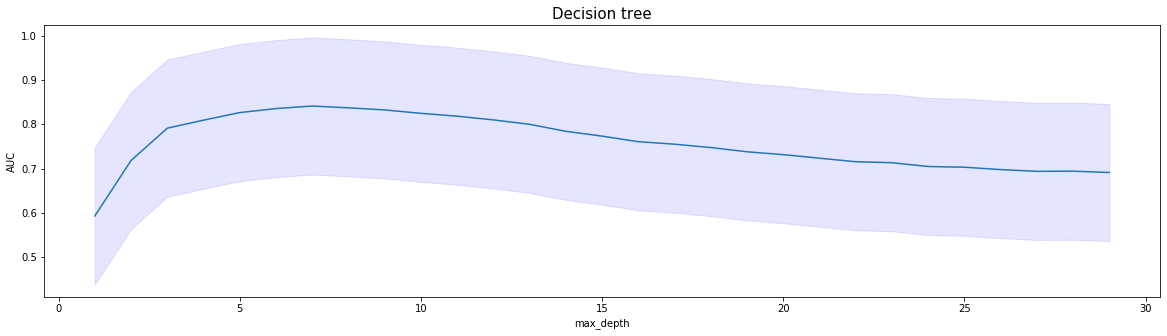

In [13]:
neighbors = np.arange(1, 30)
mean_scores = grid.cv_results_['mean_test_score']
ci = 1.96 * np.std(mean_scores) / np.mean(mean_scores)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(neighbors, mean_scores)
ax.fill_between(neighbors, (mean_scores-ci), (mean_scores+ci), color='b', alpha=.1)
ax.set_title('Decision tree',fontsize= 15)
ax.set_xlabel("max_depth", fontsize= 10)
ax.set_ylabel("AUC", fontsize= 10);

### SGD Linear Classifier

In [14]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=10000)
grid_params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                        'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
grid = GridSearchCV(sgd, grid_params, cv=5, scoring='roc_auc')
grid.fit(X_numeric, y_dummy);

In [15]:
grid.best_params_

{'loss': 'modified_huber'}

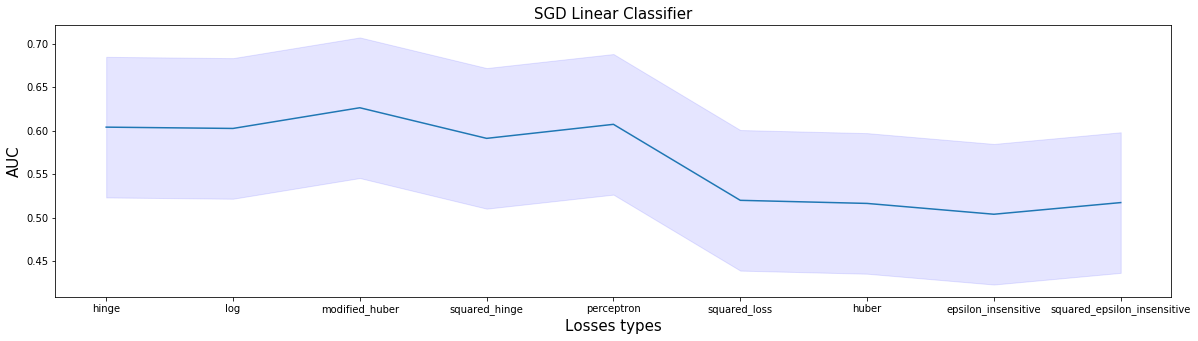

In [16]:
losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                        'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
mean_scores = grid.cv_results_['mean_test_score']
ci = 1.96 * 0.5 * np.std(mean_scores) / np.mean(mean_scores)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(losses, mean_scores)
ax.fill_between(losses, (mean_scores-ci), (mean_scores+ci), color='b', alpha=.1)
ax.set_title('SGD Linear Classifier',fontsize= 15)
ax.set_xlabel("Losses types", fontsize= 15)
ax.set_ylabel("AUC", fontsize= 15);

Что вы можете сказать о получившихся графиках?

**(1 балл)** Также подберём число деревьев (*n_estimators*) в алгоритме RandomForest. Как известно, в общем случае Random Forest не переобучается с увеличением количества деревьев, так что при увеличении этого гиперпараметра его качество не будет становиться хуже. Поэтому подберите такое количество деревьев, при котором качество на кросс-валидации стабилизируется. Обратите внимание, что для проведения этого эксперимента не нужно с нуля обучать много случайных лесов с различными количествами деревьев. Обучите один случайный лес с максимальным интересным количеством деревьев, а затем рассмотрите подмножества разных размеров, состоящие из деревьев построенного леса (поле [*estimators_*](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). В дальнейших экспериментах используйте это количество деревьев.

Окей, посмотрим где кросс-валидация стабилизируется

In [61]:
from sklearn.ensemble import RandomForestClassifier
cross_val_list = list()
for i in range(1, 1000, 100):
    clf = RandomForestClassifier(n_estimators=i, max_depth=2, random_state=0)
    cross_val_list.append(cross_val_score(clf, X_numeric, y_dummy).mean())

In [65]:
cross_val_list

[0.761190766549598,
 0.7969637108714549,
 0.7953345156938727,
 0.7953997047282747,
 0.7953997047282747,
 0.7952042013069647,
 0.7955951869222858,
 0.7955951869222858,
 0.7955300191151824,
 0.7954648513080792]

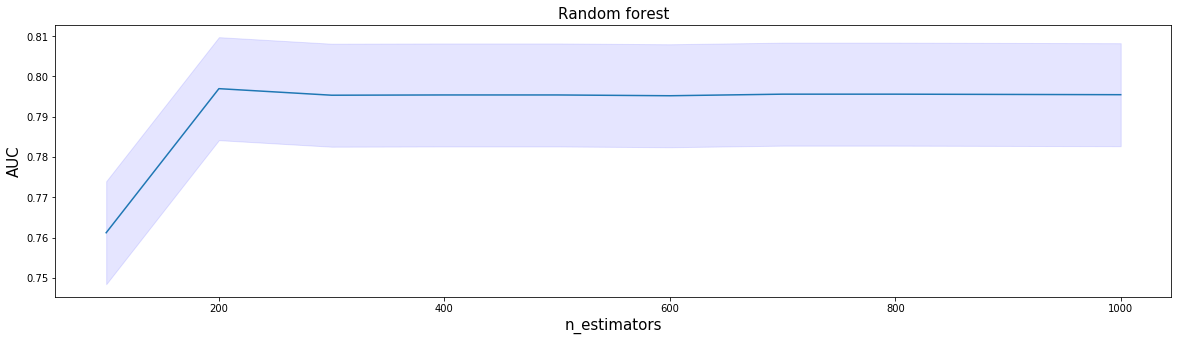

In [63]:
mean_scores = cross_val_list
ci = 1.96 * 0.5 * np.std(mean_scores) / np.mean(mean_scores)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(n_estimators, mean_scores)
ax.fill_between(n_estimators, (mean_scores-ci), (mean_scores+ci), color='b', alpha=.1)
ax.set_title('Random forest',fontsize= 15)
ax.set_xlabel("n_estimators", fontsize= 15)
ax.set_ylabel("AUC", fontsize= 15);

Кросс валидация примерно константа от 200 до 1000, далее в решении буду использовать 500

При обучении алгоритмов стоит обращать внимание не только на качество, но и каким образом они работают с данными. В этой задаче получилось так, что некоторые из используемых алгоритмов чувствительны к масштабу признаков. Чтобы убедиться, что это как-то могло повлиять на качество давайте посмотрим на сами признаки.

**(0.5 балла)** Постройте гистограммы для признаков *age*, *fnlwgt*, *capital-gain*.

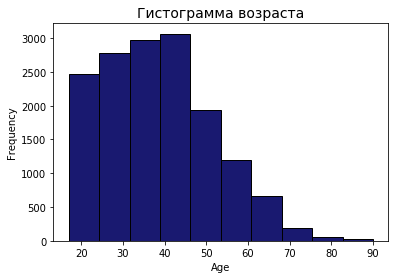

In [20]:
plt.hist(X_numeric['age'], rwidth=1, histtype='bar', color='midnightblue', alpha=1, edgecolor='black')
plt.xlabel('Age', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Гистограмма возраста', fontsize=14);

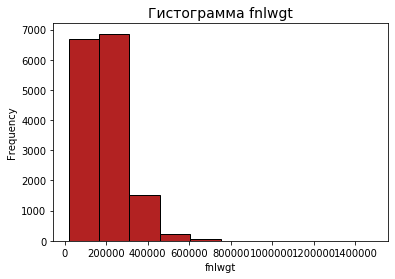

In [21]:
plt.hist(X_numeric['fnlwgt'], rwidth=1, histtype='bar', color='firebrick', alpha=1, edgecolor='black')
plt.xlabel('fnlwgt', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Гистограмма fnlwgt', fontsize=14);

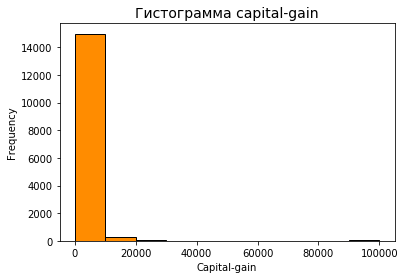

In [22]:
plt.hist(X_numeric['capital-gain'], rwidth=1, histtype='bar', color='darkorange', alpha=1, edgecolor='black')
plt.xlabel('Capital-gain', fontsize=10);
plt.ylabel('Frequency', fontsize=10);
plt.title('Гистограмма capital-gain', fontsize=14);

**(0.5 балла)** Глядя на получившиеся графики в чем заключается особенность данных? На какие алгоритмы это может повлиять? Может ли масшитабирование повлиять на работу этих алгоритмов?

##### Они неотмасштабированы. Например, возраст лежит в промежутке от 0 до 100, а кэпитал-гейн в промежутке от 0 до 14000. Мы никак не можем сравнивать эти данные, потому что у них разные абсолютные значения. Для алгоритмов, где есть регулярищация масштабирование существенно. В то же время существуют алгоритмы, где это несущественно,  например, random forest не зависит от масштабирования, потому что имеет значение прохождение или непрохождение порога, которое никак не зависит от масштаба.

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

Похожие схемы масштабирования приведены в классах [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) и [MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 
**(1 балл)** Масштабируйте все вещественные признаки одним из указанных способов и подберите оптимальные значения гиперпараметров аналогичо пункту выше.

### KNN

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_numeric)
X_scaled = scaler.transform(X_numeric)
X_scaled

array([[-0.3429185 ,  0.90025802, -0.45078777, -0.06559951, -0.21874041,
         1.58822305],
       [ 0.11476013,  0.01068271, -0.05908582, -0.15043862, -0.21874041,
        -0.07417817],
       [-0.19035896, -0.10628026,  1.11602004, -0.15043862, -0.21874041,
        -0.07417817],
       ...,
       [-0.8768769 , -0.79685293,  1.11602004, -0.15043862, -0.21874041,
        -0.07417817],
       [ 1.56407578,  0.74838115, -0.45078777, -0.15043862, -0.21874041,
        -0.07417817],
       [-0.41919828, -1.22374144,  1.11602004, -0.15043862,  4.47344431,
         0.34142214]])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
neighbors_range = dict(n_neighbors = np.arange(1, 31))
grid = GridSearchCV(knn, neighbors_range, cv=5, scoring='roc_auc')
grid.fit(X_scaled, y_dummy)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='roc_auc')

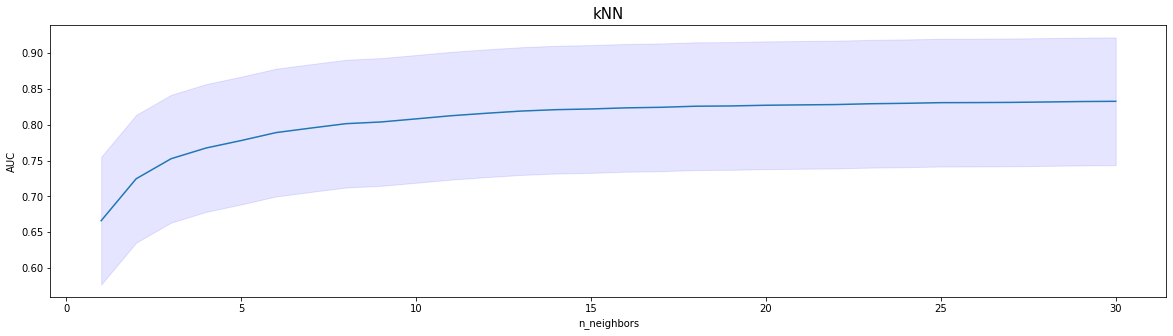

In [25]:
neighbors = np.arange(1, 31)
mean_scores = grid.cv_results_['mean_test_score']
ci = 1.96 * np.std(mean_scores) / np.mean(mean_scores)

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(neighbors, mean_scores)
ax.fill_between(neighbors, (mean_scores-ci), (mean_scores+ci), color='b', alpha=.1)
ax.set_title('kNN',fontsize= 15)
ax.set_xlabel("n_neighbors", fontsize= 10)
ax.set_ylabel("AUC", fontsize= 10);

In [26]:
print('kNN best score:', grid.best_score_)

kNN best score: 0.8328448743676369


### SGD

In [27]:
sgd = SGDClassifier()
grid_params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                        'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
grid = GridSearchCV(sgd, grid_params, cv=5, scoring='roc_auc')
grid.fit(X_scaled, y_dummy);
print('SGD best score:', grid.best_score_)

SGD best score: 0.8221525215169805


### Random Forest

In [28]:
rfc = RandomForestClassifier()
n_estimators = np.arange(100, 1100, 100)
grid_params = {'n_estimators': n_estimators}
grid = GridSearchCV(rfc, grid_params, cv=5, scoring='roc_auc')
grid.fit(X_scaled, y_dummy);
print('Random Forest best score:', grid.best_score_)

Random Forest best score: 0.8207848290437838


### Decision tree

In [29]:
dtc = DecisionTreeClassifier()
maxdepth_range = dict(max_depth = np.arange(1, 30))
grid = GridSearchCV(dtc, maxdepth_range, cv=5, scoring='roc_auc')
grid.fit(X_scaled, y_dummy)
print('Decition tree best score:', grid.best_score_)

Decition tree best score: 0.841327240392771


Изменилось ли качество у некоторых алгоритмов?

Да, изменилось. Улучшилось у knn и у SGD

**(1,5 балла)** Теперь сделайте перебор нескольких гиперпараметров по сетке и найдите оптимальные комбинации (лучшее среднее значение качества) для каждого алгоритма в данном случае: 
 - KNN — число соседей (*n_neighbors*) и метрика (*metric*)
 - DecisonTree — глубина дерева (*max_depth*) и критерий разбиения (*criterion*)
 - RandomForest — критерий разбиения в деревьях (*criterion*) и *max_features* (при фиксированном количестве деревьев, найденном ранее)
 - SGDClassifier — оптимизируемая функция (*loss*) и *penalty*
 
Обратите внимание, что эта операция может быть ресурсо- и трудоемкой. Как оптимизировать подбор параметров по сетке сказано в разделе "Подбор гиперпараметров модели"

### KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
grid_param = dict(n_neighbors = np.arange(1, 31), metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski',
                                                            'wminkowski', 'seuclidean'])
grid = GridSearchCV(knn, grid_param, cv=5, scoring='roc_auc')
grid.fit(X_scaled, y_dummy)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn/neighbors/_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn/neighbors/_dist_metrics.pyx", line 289, in sklear

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn/neighbors/_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn/neighbors/_dist_metrics.pyx", line 289, in sklear

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn/neighbors/_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn/neighbors/_dist_metrics.pyx", line 289, in sklear

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 452, in _fit
    self._tree = BallTree(X, self.leaf_size,
  File "sklearn/neighbors/_binary_tree.pxi", line 1061, in sklearn.neighbors._ball_tree.BinaryTree.__init__
  File "sklearn/neighbors/_dist_metrics.pyx", line 289, in sklear

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='roc_auc')

In [31]:
print('KNN best score:', grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

KNN best score: 0.8334962949015606
{'metric': 'manhattan', 'n_neighbors': 28}
KNeighborsClassifier(metric='manhattan', n_neighbors=28)


### Decision tree

In [32]:
grid_param = dict(max_depth = np.arange(1, 30), criterion = ['gini', 'entropy'])
grid = GridSearchCV(dtc, grid_param, cv=5, scoring='roc_auc')
grid.fit(X_numeric, y_dummy)
print('DCT best score:', grid.best_score_)
print('DCT best param:', grid.best_params_)
print('DCT best estimator:', grid.best_estimator_)

DCT best score: 0.8427968077404954
DCT best param: {'criterion': 'entropy', 'max_depth': 8}
DCT best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8)


### SGD

In [35]:
grid_params = {'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                        'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty': ['l2', 'l1', 'elasticnet']}
grid = GridSearchCV(sgd, grid_params, cv=5, scoring='roc_auc')
grid.fit(X_scaled, y_dummy);
print('SGD best score:', grid.best_score_)
print('SGD best param:', grid.best_params_)
print('SGD best estimator:', grid.best_estimator_)

SGD best score: 0.8230026338862302
SGD best param: {'loss': 'log', 'penalty': 'l1'}
SGD best estimator: SGDClassifier(loss='log', penalty='l1')


### Random forest

In [36]:
grid_params = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1, 32)}
rfc = RandomForestClassifier(n_estimators=500)
grid = GridSearchCV(rfc, grid_params, cv=5, scoring='roc_auc')
grid.fit(X_numeric, y_dummy);
print('RFC time:')
print('RFC best score:', grid.best_score_)
print('RFC best param:', grid.best_params_)
print('RFC best estimator:', grid.best_estimator_)

RFC time:
RFC best score: 0.8563326250856329
RFC best param: {'criterion': 'entropy', 'max_depth': 11}
RFC best estimator: RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=500)


Какой из алгоритмов имеет наилучшее качество? 

**(0.5 балла)** Сравните алгоритмы с точки зрения времени обучения. Обучение какого из алгоритмов работает дольше всего и, как вы думаете, почему?

Random Forest показывает наилучшее качество и Random Forest работает дольше всего, так как в нем происходит очень большое количество итераций и переборов.

## Добавление категориальных признаков в модели

Пока мы не использовали нечисловые признаки, которые есть в датасете. Давайте посмотрим, правильно ли мы сделали и увеличится ли качество моделей после добавлениях этих признаков. 

**(0.5 балла)** Преобразуйте все категориальные признаки с помощью метода one-hot-encoding (например, это можно сделать с помощью функции [pandas.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) или [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) из sklearn).

In [37]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,34,Local-gov,284843,HS-grad,9,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60
1,40,Private,190290,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,40
2,36,Local-gov,177858,Bachelors,13,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40
3,22,Private,184756,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30
4,47,Private,149700,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40


In [38]:
X_dummy = pd.get_dummies(df2)
X_dummy

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,34,284843,9,594,0,60,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,40,190290,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,36,177858,13,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3,22,184756,10,0,0,30,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,47,149700,13,15024,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,25,514716,13,0,0,40,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
16276,32,207668,13,15024,0,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
16277,27,104457,13,0,0,40,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
16278,59,268700,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


Так как после кодирования признаков получилось достаточно много, в этой работе мы не будем добавлять их и подбирать заново оптимальные гиперпараметры. 

**(0.5 балла)** Добавьте к масштабированным вещественным признакам закодированные категориальные и обучите алгоритмы с наилучшими гиперпараметрами из предыдущего пункта. Дало ли добавление новых признаков прирост качества? Измеряйте качество как и раньше используя 5-Fold CV. Для этого удобно воспользоваться функцией [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html).

In [39]:
X_numeric

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,34,284843,9,594,0,60
1,40,190290,10,0,0,40
2,36,177858,13,0,0,40
3,22,184756,10,0,0,30
4,47,149700,13,15024,0,40
...,...,...,...,...,...,...
16275,25,514716,13,0,0,40
16276,32,207668,13,15024,0,45
16277,27,104457,13,0,0,40
16278,59,268700,9,0,0,40


In [40]:
X_dummy[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(X_dummy[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 
                                                                                                                              'hours-per-week']])
X_dummy

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male
0,-0.342919,0.900258,-0.450788,-0.065600,-0.218740,1.588223,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.114760,0.010683,-0.059086,-0.150439,-0.218740,-0.074178,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.190359,-0.106280,1.116020,-0.150439,-0.218740,-0.074178,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
3,-1.258276,-0.041382,-0.059086,-0.150439,-0.218740,-0.905379,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,0.648719,-0.371197,1.116020,1.995391,-0.218740,-0.074178,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,-1.029436,3.062953,1.116020,-0.150439,-0.218740,-0.074178,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
16276,-0.495478,0.174179,1.116020,1.995391,-0.218740,0.341422,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
16277,-0.876877,-0.796853,1.116020,-0.150439,-0.218740,-0.074178,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
16278,1.564076,0.748381,-0.450788,-0.150439,-0.218740,-0.074178,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [49]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=28)
sgd = SGDClassifier(loss='log', penalty='l1')
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8)
rfc = RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=500)
print('KNN: ', cross_val_score(knn, X_dummy, y_dummy, cv=5).mean())
print('Decision tree: ',cross_val_score(dtc, X_dummy, y_dummy, cv=5).mean())
print('SGD: ',cross_val_score(sgd, X_dummy, y_dummy, cv=5).mean())
print('Random Forest: ',cross_val_score(rfc, X_dummy, y_dummy, cv=5).mean())

KNN:  0.8338437225040145
Decision tree:  0.8432921629874451
SGD:  0.8415324623772665
Random Forest:  0.8516321139311577


Определенно стало лучше. Как и писал выше на деревья/леса это никак не влияет - основная цель это преодоление или неопредоление порога, однако на SGD и KNN влияет.

Отличается ли теперь наилучший классификатор от наилучшего в предыдущем пункте?

Да, теперь SGD и KNN стали очень близко к наилучшему - Random Forest.

## Смешивание моделей

Во всех предыдущих пунктах мы получили много сильных моделей, которые могут быть достаточно разными по своей природе (например, метод ближайших соседей и случайный лес). Часто на практике оказывается возможным увеличить качество предсказани путем смешивания подобных разных моделей. Давайте посмотрим, действительно ли это дает прирост в качестве.

Выберете из построенных моделей двух предыдущих пунктов две, которые дали наибольшее начество на кросс-валидации (обозначим их $clf_1$ и $clf_2$). Далее постройте новый классификатор, ответ которого на некотором объекте $x$ будет выглядеть следующим образом:

$$result(x) = clf_1(x) * \alpha + clf_2(x) * (1 - \alpha)$$

где $\alpha$ — гиперпараметр нового классификатора.

**(1 балл)** Подберите по сетке от 0 до 1 $\alpha$ для этого классификатора с помощью 5-Fold CV и постройте график качества в зависимости от $\alpha$ (аналогичный графику в разделе "Обучение классификаторов и оценка качества"). Дал ли этот подход прирост к качеству по сравнению с моделями ранее?

Объединим Decision Tree и Random Forest

In [50]:
from sklearn.ensemble import VotingClassifier
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=8)
clf2 = RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=500)
eclf1 = VotingClassifier(estimators=[('knc', clf1), ('rf', clf2)], voting='soft')

In [51]:
grid_params = {'weights': [[0, 1], [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6],
                           [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [1, 0]]}
grid = GridSearchCV(estimator = eclf1, param_grid = grid_params, cv = 5, scoring='roc_auc')
grid.fit(X_dummy, y_dummy)

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('knc',
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                            max_depth=8)),
                                                    ('rf',
                                                     RandomForestClassifier(criterion='entropy',
                                                                            max_depth=11,
                                                                            n_estimators=500))],
                                        voting='soft'),
             param_grid={'weights': [[0, 1], [0.1, 0.9], [0.2, 0.8], [0.3, 0.7],
                                     [0.4, 0.6], [0.5, 0.5], [0.6, 0.4],
                                     [0.7, 0.3], [0.8, 0.2], [1, 0]]},
             scoring='roc_auc')

In [52]:
print('Combined best score:', grid.best_score_)
print('Combined best param:', grid.best_params_)
print('Combined best estimator:', grid.best_estimator_)

Combined best score: 0.9118004403232035
Combined best param: {'weights': [0.1, 0.9]}
Combined best estimator: VotingClassifier(estimators=[('knc',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=8)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=11,
                                                     n_estimators=500))],
                 voting='soft', weights=[0.1, 0.9])


## Сравнение построенных моделей

![](http://cdn.shopify.com/s/files/1/0870/1066/files/compare_e8b89647-3cb6-4871-a976-2e36e5987773.png?1750043340268621065)

После того как было построено много моделей хотелось бы сравнить их между собой. Для этого можно построить "ящик с усами" (диаграму размаха). Для этого можно воспользоваться библиотекой [matplotlib](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.boxplot.html) или [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

**(1 балл)** Для каждого типа классификатора (kNN, DecisionTree, RandomForest, SGD classifier), а так же смешанной модели выберете тот, которых давал наилучшее качество на кросс-валидации и постройте диаграмму размаха (все классификаторы должны быть изображены на одном графике).
 
Сделайте общие итоговые выводы о классификаторах с точки зрения их работы с признаками и сложности самой модели (какие гиперпараметры есть у модели, сильно ли изменение значения гиперпараметра влияет на качество модели).

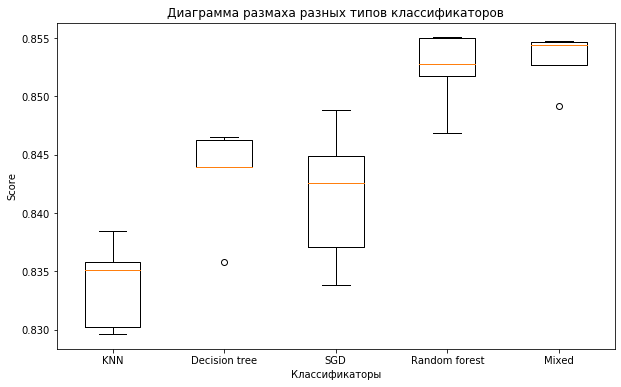

In [53]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Диаграмма размаха разных типов классификаторов')
ax1.set_xlabel('Классификаторы')
ax1.set_ylabel('Score')
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=28)
sgd = SGDClassifier(loss='log', penalty='l1')
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8)
rfc = RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=500)
eclf1 = VotingClassifier(estimators=[('knc', SGDClassifier(loss='log', penalty='l1')),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=11,
                                                     n_estimators=500))],
                 voting='soft', weights=[0.1, 0.9])
ax1.boxplot([cross_val_score(knn, X_dummy, y_dummy, cv=5), 
             cross_val_score(dtc, X_dummy, y_dummy, cv=5), 
             cross_val_score(sgd, X_dummy, y_dummy, cv=5), 
             cross_val_score(rfc, X_dummy, y_dummy, cv=5),
             cross_val_score(eclf1, X_dummy, y_dummy, cv=5)]);
plt.xticks([1, 2, 3, 4, 5], ['KNN', 'Decision tree', 'SGD', 'Random forest', 'Mixed']);

Как видно, Decision tree, Random Forest и Mixed работают лучше всего. Для SGD очень сильно влияло наличие scaler, после его использования score сильно увеличился. Различные гиперпараметры для разных данных показывают разные результаты, именно поэтому мы исопльзовали различные гиперпараметры и перебирали их для нахождения наилучшего.